<a href="https://colab.research.google.com/github/hugomcarvalho/hugomcarvalho/blob/main/classificacao_de_textos_com_rede_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Import do pandas e read do csv


In [1]:
import pandas as pd
df = pd.read_csv('reclamacoes_amostra.csv', sep = ';', header = 'infer')
print(df)

                    cidade  ...    classificacao
0          Franco da Rocha  ...      Atendimento
1                  Jacareí  ...          Entrega
2                São Paulo  ...          Produto
3                São Paulo  ...  Estabelecimento
4    Santa Helena de Goiás  ...          Entrega
..                     ...  ...              ...
105             São Carlos  ...  Estabelecimento
106         Ribeirão Preto  ...  Estabelecimento
107              São Paulo  ...  Estabelecimento
108              Guarulhos  ...  Estabelecimento
109               Londrina  ...  Estabelecimento

[110 rows x 5 columns]


# Olhando o conteudo do dataset

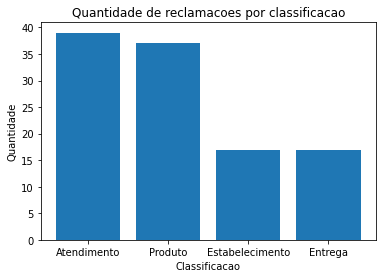

In [4]:
from matplotlib import pyplot as plt

classificacao = df['classificacao'].value_counts()
plt.bar(classificacao.keys(), classificacao)
plt.title('Quantidade de reclamacoes por classificacao')
plt.xlabel('Classificacao')
plt.ylabel('Quantidade')
plt.show()

# Limpeza de dados

In [9]:
descricoes = df['descricao']
print(descricoes)

0      Comprei pelo site Supermercado um painel p tv ...
1      A geladeira foi comprada na loja física, no di...
2      Realizei a compra do Fone de ouvido da marca B...
3      Fui jantar no Supermercado e apareceu uma bara...
4      Na data do dia 30 de Novembro de 2019, ao entr...
                             ...                        
105    frequento a loja do Supermercado no Ribeirão S...
106    Frequento a loja Supermercado no Ribeirão Shop...
107    Hoje dia 29 abril, as 13:00 estive no Supermer...
108    Estou totalmente indignado com o péssimo atend...
109    Fui domingo no Supermercado com minha filha de...
Name: descricao, Length: 110, dtype: object


In [37]:
import unicodedata as ud
import re
import string

def normalizarTexto(texto):
  # Normalizacao remove acentos e cedilhas
  textoNormalizado = ud.normalize('NFD', texto).encode('ascii', 'ignore').decode('ascii')
  # print(textoNormalizado)

  # Regex para substituir pontuacoes por espaços em branco
  regex_pontuacoes =  re.compile('[%s]' % re.escape(string.punctuation))
  textoSemPontuacao = regex_pontuacoes.sub(' ', textoNormalizado)
  # print(textoSemPontuacao)

  # Mudar o texto para minusculo
  textoMinusculo = textoSemPontuacao.lower()

  # Separar por espaços em branco
  palavras = textoMinusculo.split()

  # Remover duplicados
  palavras = set(palavras)

  # Remover o que não é texto
  palavras = [palavra for palavra in palavras if palavra.isalpha() and len(palavra) > 2]

  palavras.sort()
  # print(palavras)

  return palavras

In [ ]:
todas_descricoes = ' '.join(descricoes)
bag_of_words = normalizarTexto(todas_descricoes)
print(len(bag_of_words))

In [49]:
# X é a entrada de dados
X = []

for descricao in descricoes:
  # Normalizar a descricao e pegar suas palavras
  palavras_reclamacao = normalizarTexto(descricao)

  # Verificar se cada palavra da reclamacao está contida na bag_of_words
  descricao_binarizada = []
  for word in bag_of_words:
    if word in palavras_reclamacao:
      descricao_binarizada.append(1)
    else:
      descricao_binarizada.append(0)

  print(descricao_binarizada)
  X.append(descricao_binarizada)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [50]:
classificacao = df['classificacao']
print(classificacao)

from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()

# Y é a saída da classificacao
y = labelEncoder.fit_transform(classificacao)
print(y)
print(labelEncoder.classes_)

0          Atendimento
1              Entrega
2              Produto
3      Estabelecimento
4              Entrega
            ...       
105    Estabelecimento
106    Estabelecimento
107    Estabelecimento
108    Estabelecimento
109    Estabelecimento
Name: classificacao, Length: 110, dtype: object
[0 1 3 2 1 2 3 3 1 0 1 3 1 3 0 1 1 3 0 0 3 3 2 3 3 0 0 0 3 3 0 0 0 0 0 3 0
 3 0 0 0 3 3 0 0 0 3 3 3 0 0 0 0 0 3 1 0 2 3 3 0 3 0 1 3 3 0 0 0 0 3 0 0 3
 1 3 3 1 1 0 0 3 3 0 0 3 0 3 1 1 2 2 3 3 3 1 1 3 1 2 2 2 2 2 2 2 2 2 2 2]
['Atendimento' 'Entrega' 'Estabelecimento' 'Produto']


# Separar os dados em 'treino' e 'teste'

In [113]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, stratify=y, train_size=0.8, test_size=0.2, random_state=123)

print('Treino')
print(X_treino)
print(y_treino)

print('Teste')
print(X_teste)
print(y_teste)


Treino
[[0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

# Treinar uma rede neural

In [114]:
# Rede Perceptrom de múltiplas camadas

from sklearn.neural_network import MLPClassifier

modelo = MLPClassifier(hidden_layer_sizes=(len(bag_of_words), 1000, 50), max_iter=1000, random_state=123).fit(X_treino, y_treino)

In [116]:
predicao = modelo.predict(X_teste)

score = modelo.score(X_teste, y_teste)
print(score)

0.7727272727272727


# Avaliar o modelo

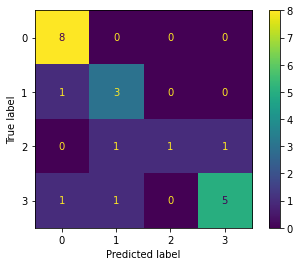

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_teste, predicao, labels=modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot()

# Novo texto para classificação

In [124]:
df2 = pd.read_csv('reclamacoes_validacao.csv', sep=';', header='infer')
print(df2)

            cidade  ...                                          descricao
0       Uberlândia  ...  Fiz uma compra no Supermercado na cidade de Ub...
1        São Paulo  ...  Loja minuto da Rua Ulisses Cruz... fui comprar...
2        São Paulo  ...  Olá, A loja da Rua Sócrates segue fazendo baru...
3   Rio de Janeiro  ...  O que falar sobre a entrega do Supermercado ??...
4        São Paulo  ...  No mês de junho procurei no aplicativo do Supe...
..             ...  ...                                                ...
95       São Paulo  ...  Fui a Leroy Merlin no dia 24/10 por volta das ...
96          Santos  ...  Boa tarde Durante o mes de novembro comprei R$...
97  Rio de Janeiro  ...  PREENCHI DUAS CARTELAS DO MEUS SELINHOS E JA F...
98          Santos  ...  Bom dia! Estou com 3 cartelas preenchidas de s...
99         Guarujá  ...  Mais uma vez os produtos relacionado da troca ...

[100 rows x 4 columns]


In [126]:
descricoes2 = df2['descricao'].values
print(descricoes2)

['Fiz uma compra no Supermercado na cidade de Uberlandia/MG e após ativar todas as ofertas no aplicativo, ao passar no caixa, as ofertas não foram contabilizadas. Ao chegar em casa, fui conferir o recibo e percebi que nenhuma oferta ativada no aplicativo gerou desconto na compra.'
 'Loja minuto da Rua Ulisses Cruz... fui comprar dois pacotes de açúcar de 1kg cada, dei uma nota de R$ 20,00 e para minha surpresa fui informado que não tinha troco e que eu não poderia levar o produto... melhor fechar a loja!!!'
 'Olá, A loja da Rua Sócrates segue fazendo barulho de noite, por causa dessa reforma interminável que vocês insistem em fazer de madrugada.'
 'O que falar sobre a entrega do Supermercado ??? Uma porcariaaaa!  Vc seleciona a opção retirar na loja e o local de retirada é  esse aí da foto OU SEJA, não existe. . No site e app o pedido nao é atualizado, então só descobri q quase metida da compra simplesmente nao tinha quando fui buscar. . Me foi cobrado valor de frete, apesar de ter sel

In [127]:
# X é a entrada de dados
X2 = []

for descricao in descricoes2:
  # Normalizar a descricao e pegar suas palavras
  palavras_reclamacao = normalizarTexto(descricao)

  # Verificar se cada palavra da reclamacao está contida na bag_of_words
  descricao_binarizada = []
  for word in bag_of_words:
    if word in palavras_reclamacao:
      descricao_binarizada.append(1)
    else:
      descricao_binarizada.append(0)

  print(descricao_binarizada)
  X2.append(descricao_binarizada)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [128]:
predicao2 = modelo.predict(X2)
print(predicao2)

classes_predicao2 = labelEncoder.inverse_transform(predicao2)
print(classes_predicao2)


[0 3 0 0 0 0 0 1 0 2 0 0 1 0 0 3 3 1 0 0 0 0 1 1 0 2 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 3 3 3 3 1 1 1 0 1 2 1 0 0 0 0 3 0 1 3 0 0 0 1 1 0 0 0 0 0 0 0
 3 1 1 0 0 0 0 0 0 0 0 0 1 0 0 3 0 0 0 1 0 2 1 1 0 1]
['Atendimento' 'Produto' 'Atendimento' 'Atendimento' 'Atendimento'
 'Atendimento' 'Atendimento' 'Entrega' 'Atendimento' 'Estabelecimento'
 'Atendimento' 'Atendimento' 'Entrega' 'Atendimento' 'Atendimento'
 'Produto' 'Produto' 'Entrega' 'Atendimento' 'Atendimento' 'Atendimento'
 'Atendimento' 'Entrega' 'Entrega' 'Atendimento' 'Estabelecimento'
 'Atendimento' 'Atendimento' 'Atendimento' 'Atendimento' 'Atendimento'
 'Atendimento' 'Entrega' 'Atendimento' 'Atendimento' 'Atendimento'
 'Entrega' 'Entrega' 'Atendimento' 'Atendimento' 'Atendimento'
 'Atendimento' 'Entrega' 'Produto' 'Produto' 'Produto' 'Produto' 'Entrega'
 'Entrega' 'Entrega' 'Atendimento' 'Entrega' 'Estabelecimento' 'Entrega'
 'Atendimento' 'Atendimento' 'Atendimento' 'Atendimento' 'Produto'
 'Atendimento' 'Entrega' 'Produto' 

In [129]:
df2['classificacao'] = classes_predicao2
print(df2)


            cidade  ...    classificacao
0       Uberlândia  ...      Atendimento
1        São Paulo  ...          Produto
2        São Paulo  ...      Atendimento
3   Rio de Janeiro  ...      Atendimento
4        São Paulo  ...      Atendimento
..             ...  ...              ...
95       São Paulo  ...  Estabelecimento
96          Santos  ...          Entrega
97  Rio de Janeiro  ...          Entrega
98          Santos  ...      Atendimento
99         Guarujá  ...          Entrega

[100 rows x 5 columns]


In [130]:
df2.to_csv('reclamacoes_classificadas.csv', sep=';', encoding='utf-8', index=False)
